# regression ultimate code

In [1]:
import numpy as np
import argparse

import os
import math
from math import sin

import json

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
matplotlib.rc( 'savefig', facecolor = 'white' )
from matplotlib import pyplot
%matplotlib inline

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets, models
from torchsummary import summary
torch.manual_seed(0)

i_seed = 0

import sys
sys.path.append('../') # add this line so Data and data are visible in this file
sys.path.append('../../') # add this line so Data and data are visible in this file
sys.path.append('../PatchWand/') # add this line so Data and data are visible in this file

# from PatchWand import *
from plotting_tools import *
from setting import *
# from models import *
# from models_CNN import *
from evaluate import *

from stage3_preprocess import *
# from training_util import *
# from dataset_util import *
from dataIO import *
from stage4_regression import *

from importlib import reload
%load_ext autoreload
%autoreload 2

In [2]:
parser = argparse.ArgumentParser(description='SpO2_estimate')
parser.add_argument('--input_folder', metavar='input_folder', help='input_folder',
                    default='../')
parser.add_argument('--output_folder', metavar='output_folder', help='output_folder',
                    default='../')
parser.add_argument('--training_params_file', metavar='training_params_file', help='training_params_file',
                    default='training_params_list.json')


# checklist 3: comment first line, uncomment second line
args = parser.parse_args(['--input_folder', '../../data/stage4_EE/', 
                          '--output_folder', '../../data/stage5_EE/',
#                           '--training_params_file', 'training_params_ML.json',
#                           '--training_params_file', 'training_params_baseline.json',
                         ])
# args = parser.parse_args()
print(args)

Namespace(input_folder='../../data/stage4_EE/', output_folder='../../data/stage5_EE/', training_params_file='training_params_list.json')


In [3]:
inputdir = args.input_folder
outputdir = args.output_folder

if not os.path.exists(outputdir):
    os.makedirs(outputdir)

    

# get training params and dataloaders

In [4]:
i_rep = 0

In [326]:

# results_dir_dict = {
#     'weight=0': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight0-fixed-3feat-HR_patch+RR_cosmed/numeric_results/',    
#     'weight=1000': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight1000-fixed-3feat-HR_patch+RR_cosmed/numeric_results/',
#     'weight=5000': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight5000-fixed-3feat-HR_patch+RR_cosmed/numeric_results/',
#     'weight=10000': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight10000-fixed-3feat-HR_patch+RR_cosmed/numeric_results/',
#     'weight=5000(awl)': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight5000-awl-3feat-HR_patch+RR_cosmed/numeric_results/',
# }

# results_dir_dict = {
#     'w=0|HR_patch': '../../data/stage4/DFR_DL888/ECG+SCG+PPG-auxweight0-fixed-3feat-HR_patch/numeric_results/',
#     'w=0|RR_cosmed': '../../data/stage4/DFR_DL888/ECG+SCG+PPG-auxweight0-fixed-3feat-RR_cosmed/numeric_results/',

#     'w=1000|HR_patch': '../../data/stage4/DFR_DL888/ECG+SCG+PPG-auxweight1000-fixed-3feat-HR_patch/numeric_results/',
#     'w=1000|RR_cosmed': '../../data/stage4/DFR_DL888/ECG+SCG+PPG-auxweight1000-fixed-3feat-RR_cosmed/numeric_results/',

#     'w=5000|HR_patch': '../../data/stage4/DFR_DL888/ECG+SCG+PPG-auxweight5000-fixed-3feat-HR_patch/numeric_results/',
#     'w=5000|RR_cosmed': '../../data/stage4/DFR_DL888/ECG+SCG+PPG-auxweight5000-fixed-3feat-RR_cosmed/numeric_results/',

#     'w=10000|HR_patch': '../../data/stage4/DFR_DL888/ECG+SCG+PPG-auxweight10000-fixed-3feat-HR_patch/numeric_results/',
#     'w=10000|RR_cosmed': '../../data/stage4/DFR_DL888/ECG+SCG+PPG-auxweight10000-fixed-3feat-RR_cosmed/numeric_results/',
# }


# results_dir_dict = {
#     'weight=0(awl)': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight0-awl-3feat-HR_patch+RR_cosmed/numeric_results/',    
#     'weight=1000(awl)': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight1000-awl-3feat-HR_patch+RR_cosmed/numeric_results/',
#     'weight=5000(awl)': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight5000-awl-3feat-HR_patch+RR_cosmed/numeric_results/',
#     'weight=10000(awl)': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight10000-awl-3feat-HR_patch+RR_cosmed/numeric_results/',
# }

# '../../'


# results_dir_dict = {
#     'XGBoost': '../../data/stage4/ML_regression/XGBRegressor/numeric_results/',
#     'MLP': '../../data/stage4/ML_regression/MLPRegressor/numeric_results/',
# }

# results_dir_dict = {
#     'Linear-3feat': '../../data/stage4/ML_regression/LinearRegression-3feat/numeric_results/',
#     'MLP-3feat': '../../data/stage4/ML_regression/MLPRegressor-3feat/numeric_results/',
#     'XGBoost-3feat': '../../data/stage4/ML_regression/XGBRegressor-3feat/numeric_results/',
#     'Linear-17feat': '../../data/stage4/ML_regression/LinearRegression-17feat/numeric_results/',
#     'MLP-17feat': '../../data/stage4/ML_regression/MLPRegressor-17feat/numeric_results/',
#     'XGBoost-17feat': '../../data/stage4/ML_regression/XGBRegressor-17feat/numeric_results/',
# }

# results_dir_dict = {
#     'deep-3feat': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight5000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
#     'deep-17feat': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight5000-fixed-17feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
#     'XGBoost-17feat': '../../data/stage4/ML_regression/XGBRegressor-17feat/numeric_results/',
# }



# results_dir_dict = {
#      'CardioRespRegression-3feat': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight5000-fixed-3feat-HR_patch+RR_cosmed-CardioRespRegression/numeric_results/',
#      'CardioRespXGBRegression-3feat': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight5000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
#      'CardioRespRegression-17feat': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight5000-fixed-17feat-HR_patch+RR_cosmed-CardioRespRegression/numeric_results/',
#      'CardioRespXGBRegression-17feat': '../../data/stage4/DFR_DL777/ECG+SCG+PPG-auxweight5000-fixed-17feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
# }





# experiment 1
# results_dir_dict = {
#     'w=1000|HR_patch': '../../data/stage4/DFR_DL999/rep0/auxweight1000-fixed-3feat-HR_patch-CardioRespXGBRegression/numeric_results/',
#     'w=1000|RR_cosmed': '../../data/stage4/DFR_DL999/rep0/auxweight1000-fixed-3feat-RR_cosmed-CardioRespXGBRegression/numeric_results/',
#     'w=1000|both': '../../data/stage4/DFR_DL999/rep0/auxweight1000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',

#     'w=5000|HR_patch': '../../data/stage4/DFR_DL999/rep0/auxweight5000-fixed-3feat-HR_patch-CardioRespXGBRegression/numeric_results/',
#     'w=5000|RR_cosmed': '../../data/stage4/DFR_DL999/rep0/auxweight5000-fixed-3feat-RR_cosmed-CardioRespXGBRegression/numeric_results/',
#     'w=5000|both': '../../data/stage4/DFR_DL999/rep0/auxweight5000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',

#     'w=10000|HR_patch': '../../data/stage4/DFR_DL999/rep0/auxweight10000-fixed-3feat-HR_patch-CardioRespXGBRegression/numeric_results/',
#     'w=10000|RR_cosmed': '../../data/stage4/DFR_DL999/rep0/auxweight10000-fixed-3feat-RR_cosmed-CardioRespXGBRegression/numeric_results/',
#     'w=10000|both': '../../data/stage4/DFR_DL999/rep0/auxweight10000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
# }




# experiment 2 (Table 2)
results_dir_dict = {
    # '2feat_XGB': '../../data/stage4/ML_regression/rep0/XGBRegressor-2feat/numeric_results/',
    '3feat_XGB': '../../data/stage4/ML_regression/rep0/XGBRegressor-3feat/numeric_results/',
    '24feat_XGB': '../../data/stage4/ML_regression/rep0/XGBRegressor-24feat/numeric_results/',
    
    '3feat_CR_XGB': '../../data/stage4/DFR_DL999/rep0/auxweight5000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    '24feat_CR_XGB': '../../data/stage4/DFR_DL999/rep0/auxweight5000-fixed-24feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',   
    
    '3feat_CR_MLP': '../../data/stage4/DFR_DL999/rep0/auxweight5000-fixed-3feat-HR_patch+RR_cosmed-CardioRespRegression-ch=1|spec=1/numeric_results/',
    '24feat_CR_MLP': '../../data/stage4/DFR_DL999/rep0/auxweight5000-fixed-24feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
}
# experiment 3 (Table 3)
# results_dir_dict = {
#     'ch=0|spec=0': '../../data/stage4/DFR_DL999/rep0/auxweight1000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression-ch=0|spec=False/numeric_results/',
#     'ch=0|spec=1': '../../data/stage4/DFR_DL999/rep0/auxweight1000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression-ch=0|spec=True/numeric_results/',
#     'ch=1|spec=0': '../../data/stage4/DFR_DL999/rep0/auxweight1000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression-ch=1|spec=False/numeric_results/',
#     'ch=1|spec=1': '../../data/stage4/DFR_DL999/rep0/auxweight1000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression-ch=1|spec=True/numeric_results/',
# }

# experiment 4 (figure 8)
results_dir_dict = {
    'weight=0': '../../data/stage4/DFR_DL999/rep1/auxweight0-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    'weight=100': '../../data/stage4/DFR_DL999/rep1/auxweight100-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    'weight=200': '../../data/stage4/DFR_DL999/rep1/auxweight200-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    'weight=500': '../../data/stage4/DFR_DL999/rep1/auxweight500-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    'weight=1000': '../../data/stage4/DFR_DL999/rep1/auxweight1000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    'weight=2000': '../../data/stage4/DFR_DL999/rep1/auxweight2000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    'weight=5000': '../../data/stage4/DFR_DL999/rep1/auxweight5000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    'weight=10000': '../../data/stage4/DFR_DL999/rep1/auxweight10000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    'weight=20000': '../../data/stage4/DFR_DL999/rep1/auxweight20000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
    'weight=50000': '../../data/stage4/DFR_DL999/rep1/auxweight50000-fixed-3feat-HR_patch+RR_cosmed-CardioRespXGBRegression/numeric_results/',
}






sorter = list(results_dir_dict.keys())

In [327]:
task_name = 'merged-HR_patch'
task_name = 'merged-RR_cosmed'

task_name = 'VO2_cosmedweighted'

In [328]:
df_outputlabel = pd.DataFrame()

for key in results_dir_dict:
    folder = results_dir_dict[key]    
    
    if 'ML_regression' in folder:
        df = pd.read_csv(folder+'df_outputlabel_val.csv')
    elif 'DFR_DL' in folder:
        df = pd.read_csv(folder+'df_outputlabel_val_{}.csv'.format(task_name))
    
    df['method'] = key
    # df['label_est'] = df['label_est']/df['weight']
    # df['label'] = df['label']/df['weight']
    
    df_outputlabel = df_outputlabel.append(df)

In [329]:
# df

In [330]:
# df

In [331]:
df_performance = pd.DataFrame()


for method in df_outputlabel['method'].unique():
    for subject_id in  df_outputlabel['CV'].unique():
        # print(method, subject_id)
        mask = (df_outputlabel['method']==method) & (df_outputlabel['CV']==subject_id)

        df = df_outputlabel[mask]

        # print(df.shape, method)
        df = get_df_performance(df['label'].values, df['label_est'].values, subject_id, df['task'].values[0])
        df['method'] = method
        df['subject_id'] = subject_id
        df_performance = df_performance.append(df)


In [332]:
# df_performance = pd.DataFrame()


# for method in df_outputlabel['method'].unique():
#     # for subject_id in  df_outputlabel['CV'].unique():
#         # print(method, subject_id)
#     mask = (df_outputlabel['method']==method)

#     df = df_outputlabel[mask]

#     df = get_df_performance(df['label'].values, df['label_est'].values, subject_id, df['task'].values[0])
#     df['method'] = method
#     df_performance = df_performance.append(df)


In [333]:
# df_performance

In [334]:
metric_name = 'PCC'
# metric_name = 'Rsquared'
metric_name = 'rmse'


In [335]:
# fig, ax = plt.subplots(1,1,figsize=(20,4), dpi=80)

# # df_performance
# sns.barplot(x = 'subject_id',
#             y = metric_name,
#             hue = 'method',
#             data = df_performance,
#             palette = "Blues",
#            ax=ax)
 
# # Show the plot
# plt.show()

In [360]:
# df_performance.groupby(['method']).mean().astype(str)[['rmse']]
pd.options.display.float_format = '{:.2f}'.format
df_table = df_performance.groupby(['method']).mean()[[metric_name]]
# df_table = df_performance.groupby(['method']).std()[['rmse']]
df_table = df_table.loc[sorter]

,rmse,method_name,weight
method,,,
weight=0,2.70,weight,0
weight=100,2.52,weight,100
weight=200,2.53,weight,200
weight=500,2.57,weight,500
weight=1000,2.60,weight,1000
weight=2000,2.58,weight,2000
weight=5000,2.40,weight,5000
weight=10000,2.41,weight,10000
weight=20000,2.47,weight,20000


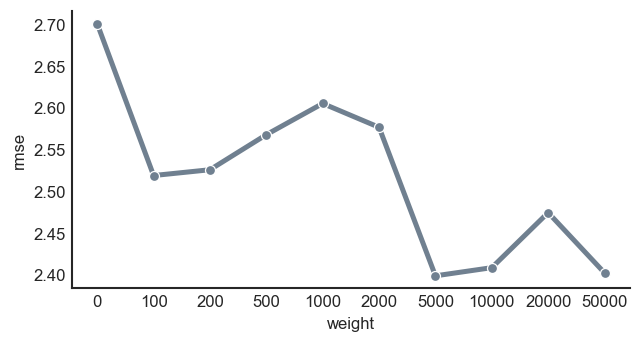

In [376]:
# df_table['weight'] = df_table.index.str.split('=', n = 2, expand = True)
# df_table
df_table[['method_name', 'weight']] = df_table.index.str.split('=', n = 2, expand = True).tolist()
df_table

fig, ax = plt.subplots(1,1,figsize=(6,3), dpi=120)

# df_performance
sns.lineplot(x='weight', y=metric_name, data=df_table, ax=ax, marker='o', linewidth=3, color='slategray')
ax_no_top_right(ax)
# sns.lineplot(data=may_flights, x="year", y="passengers")

 
# Show the plot
plt.show()

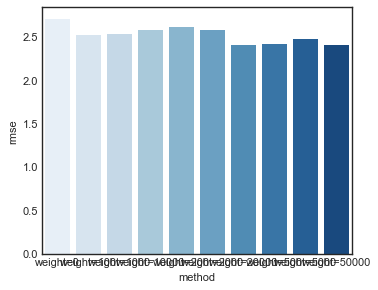

In [337]:
fig, ax = plt.subplots(1,1,figsize=(5,4), dpi=80)

# df_performance
sns.barplot(x = df_table.index,
            y = metric_name,
            data = df_table.loc[sorter],
            palette = "Blues",
           ax=ax)
 
# Show the plot
plt.show()

In [10]:
# df = df_outputlabel[df_outputlabel['method']=='MTL1000']
# df_performance = get_df_performance(df['label'].values, df['label_est'].values, -1, df['task'].values[0])
# print(df_performance)
# sns.scatterplot(x='label', y='label_est', data=df_outputlabel, color='steelblue', alpha=0.5, linewidth=0)

In [11]:
# df = df_outputlabel[df_outputlabel['method']=='no_MTL']
# df_performance = get_df_performance(df['label'].values, df['label_est'].values, -1, df['task'].values[0])
# print(df_performance)
# sns.scatterplot(x='label', y='label_est', data=df_outputlabel, color='steelblue', alpha=0.1, linewidth=0)

In [ ]:
# df_performance

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5, 3), dpi=120, facecolor='white')
fontsize = 15

sns.barplot(x="method", y="mae", data=df_performance, ax=ax, alpha=0.5)

title_str = 'Compare methods'
ax.set_title(title_str, fontsize=fontsize)
ax.set_ylabel('MAE [{}]'.format(unit_dict['VO2']), fontsize=fontsize)
ax.set_xlabel('Subject ID', fontsize=fontsize)
ax_no_top_right(ax)


In [ ]:
df_DL = pd.read_csv(inputdir_DL)  
df_DL_MTL = pd.read_csv(inputdir_DL_MTL)  
df_ML = pd.read_csv(inputdir_ML)  

df_DL['method'] = 'signals'
df_DL_MTL['method'] = 'signals_MTL'
df_ML['method'] = 'features'

In [ ]:
df_all = pd.concat([df_DL,df_DL_MTL])
df_all

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 3), dpi=120, facecolor='white')
fontsize = 15

sns.barplot(x="CV", y="mae", hue="method", data=df_all, ax=ax, alpha=0.5)

title_str = 'Compare 2 methods'
ax.set_title(title_str, fontsize=fontsize)
ax.set_ylabel('MAE [{}]'.format(unit_dict['EE']), fontsize=fontsize)
ax.set_xlabel('Subject ID', fontsize=fontsize)
ax_no_top_right(ax)


In [ ]:
sns.boxplot(x="method", y="mae",
                data=df_all, palette="Set2",
                dodge=True)

In [ ]:
ax_no_top_right(ax)

fig.tight_layout()


if fig_name is None:
    fig_name = 'regression_analysis'

if outputdir is not None:
    if not os.path.exists(outputdir):
        os.makedirs(outputdir)
    fig.savefig(outputdir + fig_name + '.png', facecolor=fig.get_facecolor())

if show_plot == False:
    plt.close(fig)
    pyplot.close(fig)
    plt.close('all')
